ax.axis("off") 

In [48]:
from ultralytics import YOLO
from ultralytics.data.converter import convert_segment_masks_to_yolo_seg
import os
from PIL import Image
import torch
import numpy as np
from matplotlib import pyplot as plt
import cv2

### Converting mask images to ultralytics yolo txt format

In [41]:
convert_segment_masks_to_yolo_seg('data/masks', 'data_for_yolo', 1) 

Processing data/masks\20210219_145754.png imgsz = 2268 x 4032
Processed and stored at data_for_yolo\20210219_145754.txt imgsz = 2268 x 4032
Processing data/masks\20210219_145800.png imgsz = 2268 x 4032
Processed and stored at data_for_yolo\20210219_145800.txt imgsz = 2268 x 4032
Processing data/masks\20210219_145803.png imgsz = 2268 x 4032
Processed and stored at data_for_yolo\20210219_145803.txt imgsz = 2268 x 4032
Processing data/masks\20210219_145824.png imgsz = 2268 x 4032
Processed and stored at data_for_yolo\20210219_145824.txt imgsz = 2268 x 4032
Processing data/masks\20210219_145827.png imgsz = 2268 x 4032
Processed and stored at data_for_yolo\20210219_145827.txt imgsz = 2268 x 4032
Processing data/masks\20210219_145832.png imgsz = 2268 x 4032
Processed and stored at data_for_yolo\20210219_145832.txt imgsz = 2268 x 4032
Processing data/masks\20210219_145839.png imgsz = 2268 x 4032
Processed and stored at data_for_yolo\20210219_145839.txt imgsz = 2268 x 4032
Processing data/mask

KeyboardInterrupt: 

### Converting images to grayscale

In [ ]:
def images_to_grayscale(folder_path):
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        image = Image.open(image_path).convert('L')
        image.save(image_path)

images_to_grayscale('data_for_yolo\\test\\images')
images_to_grayscale('data_for_yolo\\train\\images')
images_to_grayscale('data_for_yolo\\val\\images')

### Training model

In [49]:
model = YOLO("yolov8-seg.pt")
results = model.train(data="data.yaml", epochs=10, batch=8, imgsz=960)

100%|██████████| 6.74M/6.74M [00:00<00:00, 26.5MB/s]


New https://pypi.org/project/ultralytics/8.2.82 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.81  Python-3.11.9 torch-2.3.0+cu118 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
engine\trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=data.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=960, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

c:\Users\Opina\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed 


train: Scanning C:\git\darbas\pytorch label segmentation\data_for_yolo\train\labels.cache... 168 images, 6 backgrounds, 0 corrupt: 100%|██████████| 168/168 [00:00<?, ?it/s]
val: Scanning C:\git\darbas\pytorch label segmentation\data_for_yolo\val\labels.cache... 22 images, 1 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]


Plotting labels to c:\git\darbas\pytorch label segmentation\ultralytics\runs\segment\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 960 train, 960 val
Using 8 dataloader workers
Logging results to c:\git\darbas\pytorch label segmentation\ultralytics\runs\segment\train
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/21 [00:00<?, ?it/s]c:\Users\Opina\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\conv.py:952: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv_transpose2d(
       1/10      3.17G      1.886      3.936      5.263      1.885         15        960: 100%|██████████| 21/21 [00:07<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         22         37     0.0053      0.946      0.392      0.206    0.00515      0.919      0.428       0.26



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.09G      1.252       1.12      3.413      1.422         11        960: 100%|██████████| 21/21 [00:04<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.88it/s]

                   all         22         37      0.658     0.0541      0.435      0.253      0.658     0.0541      0.481      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.15G      1.105     0.7785      3.077      1.348         10        960: 100%|██████████| 21/21 [00:04<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]

                   all         22         37      0.751      0.486      0.571      0.297      0.702      0.514      0.584      0.396



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.18G      1.148       1.13      3.018      1.364          8        960: 100%|██████████| 21/21 [00:04<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         22         37      0.735      0.541      0.601       0.39      0.735      0.541      0.631       0.45



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.12G      1.095     0.6896      2.707       1.33         12        960: 100%|██████████| 21/21 [00:04<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         22         37      0.849      0.514      0.638      0.425        0.8      0.542      0.662      0.494



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.33G      1.081     0.7814      2.622      1.307         10        960: 100%|██████████| 21/21 [00:04<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         22         37      0.848      0.459      0.588      0.421      0.797      0.432      0.523      0.411



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.14G     0.9826     0.6087      2.367      1.212         19        960: 100%|██████████| 21/21 [00:04<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         22         37      0.707      0.781      0.789      0.522      0.707      0.781      0.787      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.14G     0.9689     0.5703      2.168      1.195         12        960: 100%|██████████| 21/21 [00:04<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]

                   all         22         37      0.728      0.757       0.76      0.561      0.754      0.784      0.765       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.12G     0.8929     0.5313      2.043      1.138         18        960: 100%|██████████| 21/21 [00:04<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         22         37      0.743      0.757      0.797      0.617      0.769      0.784      0.822      0.682



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10       3.2G     0.8578     0.4587      1.936       1.13         16        960: 100%|██████████| 21/21 [00:04<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]

                   all         22         37      0.759      0.784      0.817      0.643      0.786      0.811      0.834      0.687



10 epochs completed in 0.024 hours.
Optimizer stripped from c:\git\darbas\pytorch label segmentation\ultralytics\runs\segment\train\weights\last.pt, 6.8MB
Optimizer stripped from c:\git\darbas\pytorch label segmentation\ultralytics\runs\segment\train\weights\best.pt, 6.8MB

Validating c:\git\darbas\pytorch label segmentation\ultralytics\runs\segment\train\weights\best.pt...
Ultralytics YOLOv8.2.81  Python-3.11.9 torch-2.3.0+cu118 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs


c:\Users\Opina\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
c:\Users\Opina\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\conv.py:952: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv_transpose2d(
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]


                   all         22         37      0.759      0.784      0.817      0.643      0.786      0.811      0.834      0.687
Speed: 0.5ms preprocess, 5.8ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to c:\git\darbas\pytorch label segmentation\ultralytics\runs\segment\train


### Exporting model

In [50]:
model.export(format="torchscript")

Ultralytics YOLOv8.2.81  Python-3.11.9 torch-2.3.0+cu118 CPU (Intel Core(TM) i7-8700 3.20GHz)
YOLOv8n-seg summary (fused): 195 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs

PyTorch: starting from 'c:\git\darbas\pytorch label segmentation\ultralytics\runs\segment\train\weights\best.pt' with input shape (1, 3, 960, 960) BCHW and output shape(s) ((1, 37, 18900), (1, 32, 240, 240)) (6.5 MB)

TorchScript: starting export with torch 2.3.0+cu118...
TorchScript: export success  3.4s, saved as 'c:\git\darbas\pytorch label segmentation\ultralytics\runs\segment\train\weights\best.torchscript' (13.0 MB)

Export complete (5.6s)
Results saved to C:\git\darbas\pytorch label segmentation\ultralytics\runs\segment\train\weights
Predict:         yolo predict task=segment model=c:\git\darbas\pytorch label segmentation\ultralytics\runs\segment\train\weights\best.torchscript imgsz=960  
Validate:        yolo val task=segment model=c:\git\darbas\pytorch label segmentation\ultralytics\runs\segment\t

'c:\\git\\darbas\\pytorch label segmentation\\ultralytics\\runs\\segment\\train\\weights\\best.torchscript'

In [ ]:
images = []
for image_name in os.listdir("images/"):
    images.append(Image.open(os.path.join("images/", image_name)))

In [31]:
images_np = []
for image in images:
    images_np.append(np.transpose(np.array(image.resize((960, 960))), (2, 0, 1)) / 255.0)
images_tensor = torch.tensor(images_np).float()

In [ ]:
model = YOLO("best.pt")
model.export(format="torchscript")

Ultralytics YOLOv8.2.81  Python-3.11.9 torch-2.3.0+cu118 CPU (Intel Core(TM) i7-8700 3.20GHz)
YOLOv8s-seg summary (fused): 195 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs

PyTorch: starting from 'best.pt' with input shape (1, 3, 960, 960) BCHW and output shape(s) ((1, 37, 18900), (1, 32, 240, 240)) (22.8 MB)

TorchScript: starting export with torch 2.3.0+cu118...
TorchScript: export success  5.0s, saved as 'best.torchscript' (45.5 MB)

Export complete (7.9s)
Results saved to C:\git\darbas\pytorch label segmentation
Predict:         yolo predict task=segment model=best.torchscript imgsz=960  
Validate:        yolo val task=segment model=best.torchscript imgsz=960 data=data.yaml  
Visualize:       https://netron.app


'best.torchscript'

In [55]:
model = YOLO("best_n.pt")
for i in range(10):
    print(i + 1)
    results = model(images_tensor)
    print(results[0].speed)

1

0: 960x960 10 labels, 62.2ms
Speed: 4.0ms preprocess, 62.2ms inference, 20.5ms postprocess per image at shape (1, 3, 960, 960)
{'preprocess': 3.9992332458496094, 'inference': 62.23750114440918, 'postprocess': 20.473718643188477}
2

0: 960x960 10 labels, 16.9ms
Speed: 3.0ms preprocess, 16.9ms inference, 18.6ms postprocess per image at shape (1, 3, 960, 960)
{'preprocess': 2.9921531677246094, 'inference': 16.883373260498047, 'postprocess': 18.64480972290039}
3

0: 960x960 10 labels, 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 18.7ms postprocess per image at shape (1, 3, 960, 960)
{'preprocess': 1.996755599975586, 'inference': 15.00248908996582, 'postprocess': 18.735647201538086}
4

0: 960x960 10 labels, 16.8ms
Speed: 2.0ms preprocess, 16.8ms inference, 18.4ms postprocess per image at shape (1, 3, 960, 960)
{'preprocess': 2.000570297241211, 'inference': 16.774892807006836, 'postprocess': 18.403291702270508}
5

0: 960x960 10 labels, 14.8ms
Speed: 3.3ms preprocess, 14.8ms inference

{'preprocess': 5.185842514038086,
 'inference': 292.39511489868164,
 'postprocess': 27.3129940032959}

In [ ]:
results[0].masks.data.shape

torch.Size([3, 960, 960])

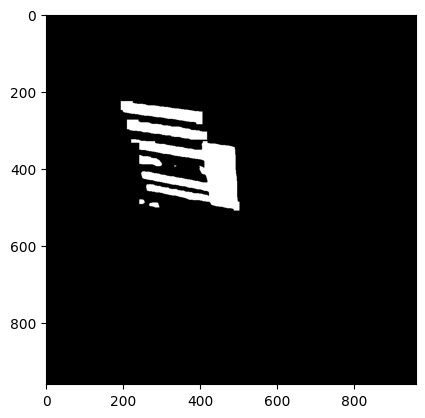

In [ ]:
plt.imshow(np.where(np.sum(np.array(results[0].cpu().masks.data), axis=0) > 0, 1, 0), cmap="gray") 

In [ ]:
model_torch = torch.jit.load("best.torchscript")
model_torch.eval()

RecursiveScriptModule(
  original_name=SegmentationModel
  (model): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(
      original_name=Conv
      (conv): RecursiveScriptModule(original_name=Conv2d)
      (act): RecursiveScriptModule(original_name=SiLU)
    )
    (1): RecursiveScriptModule(
      original_name=Conv
      (conv): RecursiveScriptModule(original_name=Conv2d)
      (act): RecursiveScriptModule(original_name=SiLU)
    )
    (2): RecursiveScriptModule(
      original_name=C2f
      (cv1): RecursiveScriptModule(
        original_name=Conv
        (conv): RecursiveScriptModule(original_name=Conv2d)
        (act): RecursiveScriptModule(original_name=SiLU)
      )
      (cv2): RecursiveScriptModule(
        original_name=Conv
        (conv): RecursiveScriptModule(original_name=Conv2d)
        (act): RecursiveScriptModule(original_name=SiLU)
      )
      (m): RecursiveScriptModule(
        original_name=ModuleList
        (0): RecursiveScriptM

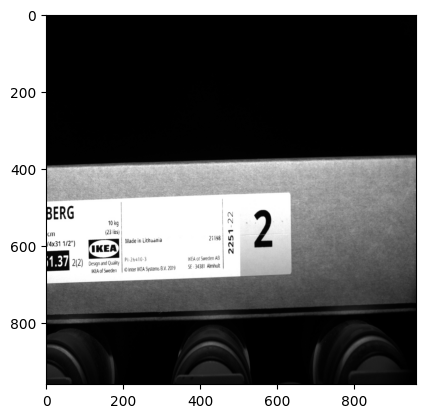

In [80]:
plt.imshow(np.transpose(images_np[1], (1, 2, 0)))

In [37]:
results = model_torch.forward(images_tensor)

In [72]:
print(results[0].shape)
print(results[1].shape)

torch.Size([2, 37, 18900])
torch.Size([2, 32, 240, 240])


In [73]:
output_0 = results[0][1]
prototypes = results[1][1]
print("number of prototypes: ", prototypes.shape[0])
print("number of different classes: ", output_0.shape[0]-4-prototypes.shape[0])

number of prototypes:  32
number of different classes:  1


In [74]:
output_0.shape

torch.Size([37, 18900])

In [75]:
prototypes.shape

torch.Size([32, 240, 240])

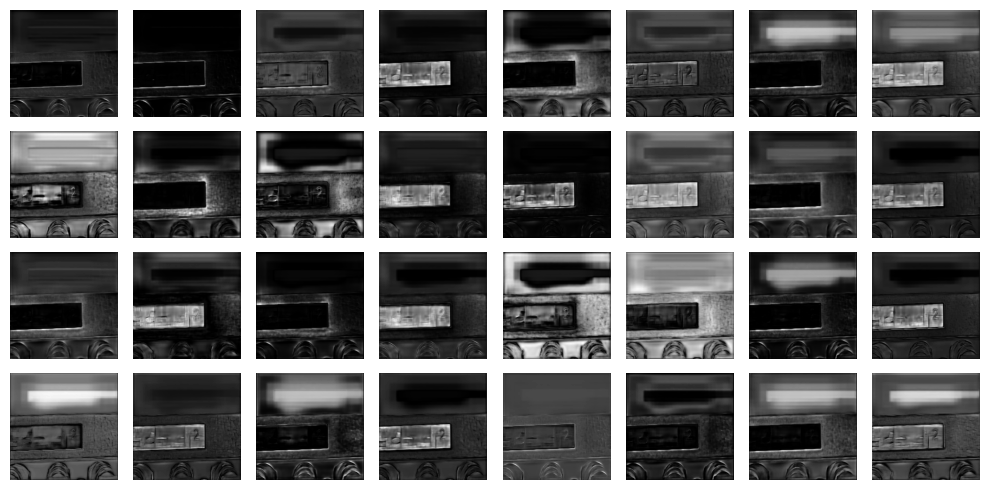

In [76]:
#####code to plot all prototypes 
# Define the number of rows and columns for the grid
num_images = len(prototypes)
num_cols = 8  # Change this according to your preference
num_rows = (num_images + num_cols - 1) // num_cols

# Plot the images
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(prototypes[i], cmap='gray')
        ax.axis('off')
    else:
        ax.axis('off')  # Hide axes for empty subplots

plt.tight_layout()
plt.show()

1
10
37


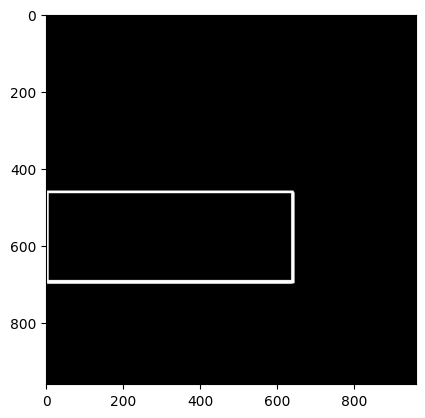

In [77]:
def nms(bounding_boxes, threshold):
    # If no bounding boxes, return empty list
    if len(bounding_boxes) == 0:
        return []

    # Bounding boxes
    boxes = np.array(bounding_boxes)
    print(f"boxes shape: {boxes.shape}")
    # Extracting coordinates
    x_mid = boxes[:, 0]
    y_mid = boxes[:, 1]
    width = boxes[:, 2]
    height = boxes[:, 3]
    
    # Calculating start and end coordinates
    start_x = x_mid - width / 2
    start_y = y_mid - height / 2
    end_x = x_mid + width / 2
    end_y = y_mid + height / 2
    score = boxes[:, 4]

    # Picked bounding boxes
    picked_boxes = []
    picked_score = []

    # Compute areas of bounding boxes
    areas = (end_x - start_x + 1) * (end_y - start_y + 1)

    print("Areas:")
    print(areas.shape)

    # Sort by confidence score of bounding boxes
    order = np.argsort(score)

    # Iterate bounding boxes
    while order.size > 0:
        # The index of largest confidence score
        index = order[-1]

        # Pick the bounding box with largest confidence score
        picked_boxes.append(bounding_boxes[index])

        # Compute ordinates of intersection-over-union(IOU)
        x1 = np.maximum(start_x[index], start_x[order[:-1]])
        x2 = np.minimum(end_x[index], end_x[order[:-1]])
        y1 = np.maximum(start_y[index], start_y[order[:-1]])
        y2 = np.minimum(end_y[index], end_y[order[:-1]])

        # Compute areas of intersection-over-union
        w = np.maximum(0.0, x2 - x1 + 1)
        h = np.maximum(0.0, y2 - y1 + 1)
        intersection = w * h

        # Compute the ratio between intersection and union
        ratio = intersection / (areas[index] + areas[order[:-1]] - intersection)

        left = np.where(ratio < threshold)

        print("---")
        print(order)
        print(left)

        order = order[left]

    print(f"picked_boxes: {len(picked_boxes)}")

    return np.array(picked_boxes)

nb_class = output_0.shape[0]-4-prototypes.shape[0] # extract total number of classes
l_class = [[] for k in range(nb_class)]
output_0_T = output_0.T # so it become shape (8400 116)
threshold_detection = 0.5 #threshold to filter irrelevent detection
theshold_iou = 0.5 #threshold for NMS algo
for detection in output_0_T:
    conf = detection[4:nb_class+4] #extract all class confidence values for one detecton
    max_conv = torch.max(conf) #maximum confidence value
    argmax_conv = torch.argmax(conf)#class of the maximum confidence value
    if max_conv > threshold_detection:
        l_class[argmax_conv].append(np.concatenate((detection[:4], np.array([max_conv]), detection[4+nb_class:])))

print(len(l_class))
print(len(l_class[0]))
print(len(l_class[0][0]))

image = np.zeros((960, 960, 3), dtype=np.uint8)
# Draw each rectangle
for rect in l_class[0]:
    x_center, y_center, width, height = rect[:4]
    
    # Calculate top-left and bottom-right points of the rectangle
    top_left = (int(x_center - width / 2), int(y_center - height / 2))
    bottom_right = (int(x_center + width / 2), int(y_center + height / 2))
    
    # Draw the rectangle on the image (color is white)
    image = cv2.rectangle(image, top_left, bottom_right, (255, 255, 255), 2)

plt.imshow(image)

In [45]:
print(len(l_class[0]))
l_class_NMS = []  
for clas in l_class:
    l_class_NMS.append(nms(clas, theshold_iou)) 

21
boxes shape: (21, 37)
Areas:
(21,)
---
[ 4 12  0 17  3 13  1  2 18  6 14 19 15  8 20 10 16  5  7 11  9]
(array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 14, 16], dtype=int64),)
---
[12  0 17  3 13  1  2 18 14 19 15 20 16]
(array([0, 1, 2, 3, 5, 6], dtype=int64),)
---
[12  0 17  3  1  2]
(array([0, 2], dtype=int64),)
---
[12 17]
(array([0], dtype=int64),)
---
[12]
(array([], dtype=int64),)
picked_boxes: 5


In [34]:
l_class_NMS[0].shape

(5, 37)

In [35]:
l_class_NMS[0][:, :4]

array([[     299.86,      83.483,      211.62,      101.02],
       [     372.07,      373.13,       257.9,      313.82],
       [      345.9,       13.15,      115.06,      25.479],
       [     373.78,      413.48,      255.41,      125.26],
       [     312.49,      170.61,      205.33,      95.879]], dtype=float32)

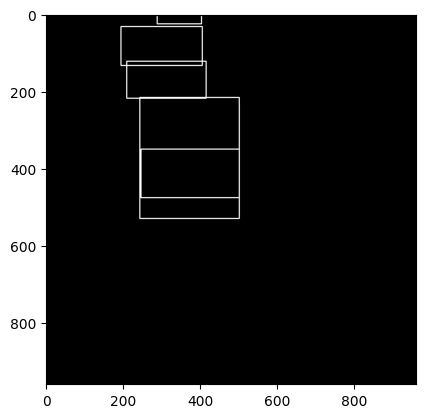

In [18]:
image = np.zeros((960, 960, 3), dtype=np.uint8)
# Draw each rectangle
for rect in l_class_NMS[0][:, :4]:
    x_center, y_center, width, height = rect
    
    # Calculate top-left and bottom-right points of the rectangle
    top_left = (int(x_center - width / 2), int(y_center - height / 2))
    bottom_right = (int(x_center + width / 2), int(y_center + height / 2))
    
    # Draw the rectangle on the image (color is white)
    image = cv2.rectangle(image, top_left, bottom_right, (255, 255, 255), 2)

plt.imshow(image)

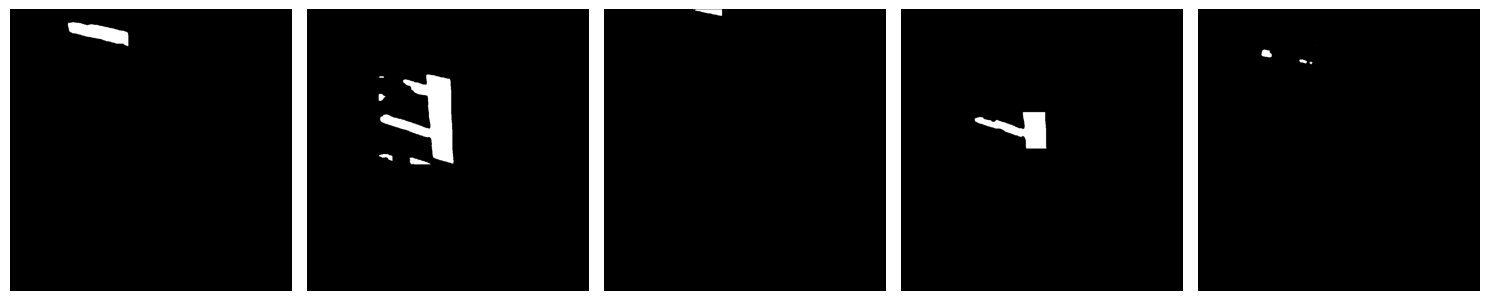

In [38]:
from skimage.transform import resize

def crop_image(image, box):
    x, y, w, h = box.astype(int)
    
    # Ensure box coordinates are within image boundaries
    x1 = max(0, x - w // 2)
    y1 = max(0, y - h // 2)
    x2 = min(image.shape[1], x + w // 2)
    y2 = min(image.shape[0], y + h // 2)
    
    # Create a mask to zero out areas outside the box
    mask = np.zeros_like(image, dtype=np.float32)
    mask[y1:y2, x1:x2] = 1
    
    # Apply the mask to the original image
    cropped_image = image * mask
    
    return cropped_image

def threshold_image(image,threshold=0.1):
    thresholded_image = np.where(image > threshold, 255,0)
    return thresholded_image


l_mask=[]
l_class=[]
l_conf=[]
for k in range(len(l_class_NMS)): #for all 80 classes
    for detection in l_class_NMS[k]: #for all detections for 1 class
        coeff = detection[5:] #extract coefficents
        mask = prototypes*coeff.reshape(prototypes.shape[0],1,1) #appy coefficients to the prototypes

        # Initialize an empty array to store resized images
        resized_mask = np.empty((mask.shape[0], 960, 960))
        
        # Resize each image in the array
        for i, image in enumerate(mask):
            resized_mask[i] = resize(image, (960, 960), anti_aliasing=True)
        l_mask.append(threshold_image(crop_image(np.mean(resized_mask, axis=0),detection[:4])))#final mask of the object
        l_class.append(k)#add the class index as
        l_conf.append(detection[4])#add the confidence value associated


#########show mask results
# Determine the number of subplots needed
num_plots = 5

# Calculate the number of rows and columns for the subplot grid
num_rows = 1  # Number of rows
num_cols = num_plots  # Number of columns

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

# Iterate over each subplot
for k, ax in enumerate(axes):
    ax.imshow(l_mask[k], cmap='gray')
    ax.axis('off')  # Turn off axis

plt.tight_layout()  # Adjust layout
plt.show()

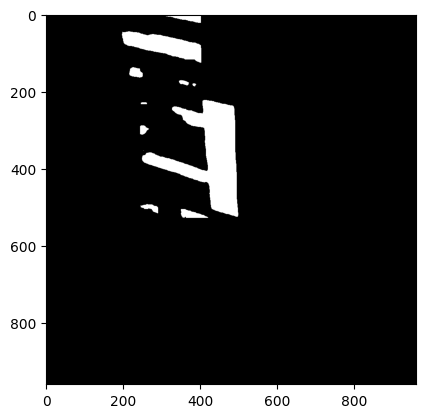

In [39]:
plt.imshow(np.where(np.sum(np.array(l_mask), axis=0) > 0, 1, 0), cmap="gray")